# Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# Unterschied zwischen (zeitlicher) Frequenz und Winkelfrequenz

$\omega$ --> Winkelfrequenz

$f$ --> (zeitl.) Frequenz

Aber: Oftmals wird in der Literatur $\omega$ für die zeitl. Frequenz verwendet – wahrscheinlich aus dem Grund, um die Frequenz, welche man mit $f$ angeben würde, nicht mit der Fourier-Funktion, die meistens mit $\hat{f}$ angegeben wird, zu verwechseln.

Für uns: wenn wir sehen, dass die Variable mit $2 \pi$ multipliziert wird, können wir daraus schließen, dass es sich um die zeitl. Frequenz handelt.

Beispiel:

$ F(\omega)= \int_{-\infty}^{\infty} f(t) \cdot e^{i\cdot2\pi\cdot \omega\cdot t} \cdot dt $

Hier ist $\omega$ **nicht** die Winkelfrequenz.



# Unterscheidung FFT | DFT | STFT

DFT: Discrete Fourier Transform

FFT: Fast Fourier Transform --> effizienter Algorithmus zur Berechnung der DFT

STFT: Short Time Fourier Transform

# Eigenschaften der DFT

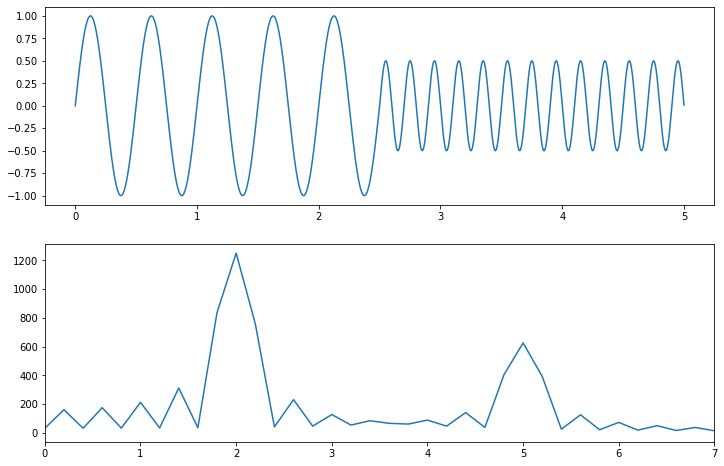

In [4]:
# verschiedene Amplituden werden auch in der DFT abgebildet

sr = 1000
length = 5
t = np.linspace(0, length, int(sr * length))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t[:int(length * sr / 2)] * 2 * np.pi),
                    np.sin(freq2 * t[:int(length * sr / 2)] * 2 * np.pi) * 0.5))

dft = np.fft.fft(x)

N = np.shape(x)[0]
k = np.arange(N)
f = k * sr / N

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, x)

plt.subplot(2, 1, 2)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()

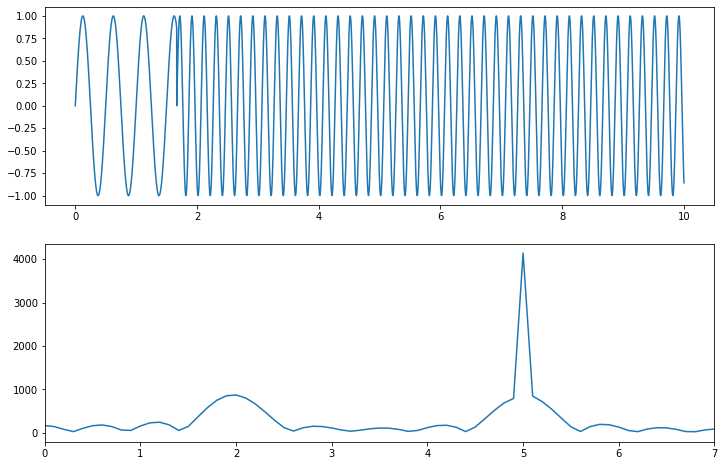

In [37]:
# verschiedene Längen werden auch in der DFT abgebildet

sr = 1000
length = 10
t = np.linspace(0, length, int(sr * length))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t[:int(np.ceil(length * sr / 6))] * 2 * np.pi),
                    np.sin(freq2 * t[:int(5 * length * sr / 6)] * 2 * np.pi) * 1))

dft = np.fft.fft(x)

N = np.shape(x)[0]
k = np.arange(N)
f = k * sr / N

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, x)

plt.subplot(2, 1, 2)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()

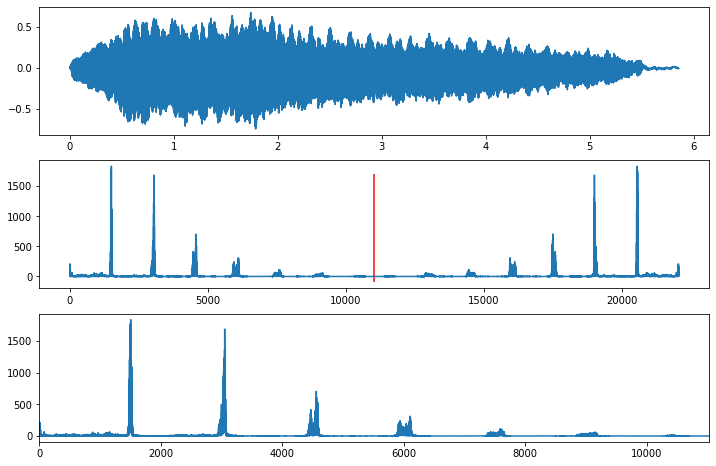

In [43]:
# DFT Symmetrie / Alias-Frequenzen

x, sr = lr.load('../data/violin.mp3')

dft = np.fft.fft(x)

N = np.shape(x)[0]
k = np.arange(N)
f = k * sr / N

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
t = np.linspace(0, N / sr, N)
plt.plot(t, x)

plt.subplot(3, 1, 2)
plt.plot(f, np.abs(dft))
plt.vlines(sr / 2, -100, 1700, colors=[1, 0, 0, 1])

plt.subplot(3, 1, 3)
plt.plot(f, np.abs(dft))
plt.xlim(0, sr / 2) # Nyquist!!!
plt.show()

In [51]:
def f_coef(k, sr, N):
    return k * sr / N

sr = 10

N = 2 * sr
print('Länge: %d sek.\nNächst-tiefste Frequenz nach 0 Hz:\t%0.2f' % (N / sr, f_coef(k=1, sr=sr, N=N)))

N = 4 * sr
print('\nLänge: %d sek.\nNächst-tiefste Frequenz nach 0 Hz:\t%0.2f' % (N / sr, f_coef(k=1, sr=sr, N=N)))
print('Nächst-nächst-tiefste Frequenz: \t%0.2f' % (f_coef(k=2, sr=sr, N=N)))

# --> heisenbergsche unschärferelation:
# je länger das signal --> desto genauer (also kleiner) Frequenzauflösung
# je kürzer das signal --> desto ungenauer (also größer) Frequenzauflösung
# wichtig für STFT

Länge: 2 sek.
Nächst-tiefste Frequenz nach 0 Hz:	0.50

Länge: 4 sek.
Nächst-tiefste Frequenz nach 0 Hz:	0.25
Nächst-nächst-tiefste Frequenz: 	0.50


# DFT Diskrete Fourier Transformation

${\displaystyle X_k =\sum_{n = 0}^{N - 1} x_n \cdot e^{-{\frac {2 \pi i}{N}} k n}}$

${\displaystyle \left\{\mathbf {X_{k}} \right\}:=X_{0},X_{1},\ldots ,X_{N-1}}$

$x_n$ ist bei uns `x`

$n$ ist ein Zeitindex; bei uns `t`

$X_k$ ist die Fourier-Transformation; bei uns `winding_analysis`

$k$ ist der Frequenz-Index (also nicht die Frequenz in Hz), d.h. bei uns die Indizes von `winding_freqs`

$N$ ist gleichzeitig der letzte Zeitindex wie auch der letzte Frequenz-Index 

In [ ]:
def calc_dft(x):

    N = np.shape(x)[0]
    n = np.linspace(0, N, N) # arange

    dft = np.array([])

    for k in range(N):
        e = np.exp(2 * np.pi * -1j * k * n / N)
        dft_k = np.sum(x * e)
        dft = np.append(dft, dft_k)
    
    return dft

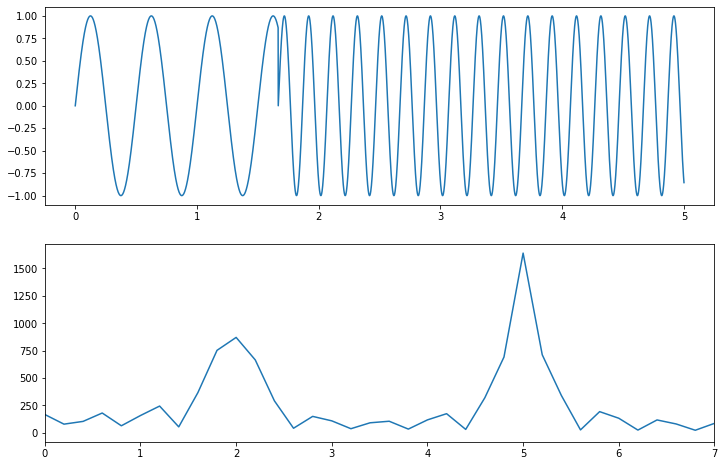

In [36]:
# obiges Beispiel mit `calc_dft`

sr = 1000
length = 5
t = np.linspace(0, length, int(sr * length))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t[:int(np.ceil(length * sr / 3))] * 2 * np.pi),
                    np.sin(freq2 * t[:int(2 * length * sr / 3)] * 2 * np.pi) * 1))

dft = calc_dft(x)

N = np.shape(x)[0]
k = np.arange(N)
f = k * sr / N

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, x)

plt.subplot(2, 1, 2)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()